# Introduction

This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis.

Describtion of the columns:

SMQ020 = Smoking (Yes or No)

DMDMARTL = Martial statues

RIAGENDR = Gender (Male Or Female)

RIDAGEYR = Age (years)

DMDEDUC2 = Education level

BMXWT = Weight (kg)

BMXHT = Height (cm)

BMXBMI = BMI

DMDEDUC2 = Education Level

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("dataset.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
num= df.shape
print(num ,'\n' f'we have {num[0]} participents')

(5735, 28) 
we have 5735 participents


In [7]:
import skimpy as skim
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5735   │ │ float64     │ 20    │                                                          │
│ │ Number of columns │ 28     │ │ int64       │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA %    ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │     0 │       0 │  88680 │     2882 │  83730 │  86160 │  88670 │  91180 │   93700 │ ▇▇▇▇▇▇ │  │
│ │ ALQ101        │   527 │    9.19 │  1.336 │   0.5055 │      1 │      1 │      1 │      2 │       9 │   ▇    │  │
│ │ ALQ110        │  4004 │   69.82 │  1.588 │   0.6239 │      1 │      1 │      2 │      2 │       9 │   ▇    │  │
│ │ ALQ130        │  2356 │   41.08 │  3.912 │    34.34 │      1 │      1 │      2 │      3 │     999 │   ▇    │  │
│ │ SMQ020        │     0 │       0 │  1.607 │    0.572 │      1 │      1 │      2 │      2 │       9 │   ▇    │  │
│ │ RIAGENDR      │     0 │       0 │  1.519 │   0.4997 │      1 │      1 │      2 │      2 │       2 │ ▇    ▇ │  │
│ │ RIDAGEYR      │     0 │       0 │  48.05 │    18.43 │     18 │     32 │     48 │     63 │      80 │ ▇▇▇▇▇▇ │  │
│ │ RIDRETH1      │     0 │       0 │  3.042 │    1.297 │      1 │      2 │      3 │      4 │       5 │ ▅▃ ▇▅▃ │  │
│ │ DMDCITZN      │     1 │    0.02 │  1.185 │   0.4917 │      1 │      1 │      1 │      1 │       9 │   ▇    │  │
│ │ DMDEDUC2      │   261 │    4.55 │  3.442 │     1.31 │      1 │      3 │      4 │   4.75 │       9 │  ▆▆▇▇  │  │
│ │ DMDMARTL      │   261 │    4.55 │  2.629 │    2.367 │      1 │      1 │      1 │      5 │      77 │   ▇    │  │
│ │ DMDHHSIZ      │     0 │       0 │  3.324 │    1.725 │      1 │      2 │      3 │      5 │       7 │ ▃▇▅▅▃▃ │  │
│ │ WTINT2YR      │     0 │       0 │  40310 │    38770 │   5331 │  17160 │  24650 │  42860 │  233800 │  ▇▁▁▁  │  │
│ │ SDMVPSU       │     0 │       0 │  1.488 │   0.4999 │      1 │      1 │      1 │      2 │       2 │ ▇    ▇ │  │
│ │ SDMVSTRA      │     0 │       0 │  126.2 │    4.244 │    119 │    123 │    126 │    130 │     133 │ ▇▅▅▇▅▇ │  │
│ │ INDFMPIR      │   601 │   10.48 │  2.403 │    1.602 │      0 │   1.06 │   1.98 │   3.74 │       5 │ ▅▇▅▃▂▇ │  │
│ │ BPXSY1        │   334 │    5.82 │  125.1 │    18.48 │     82 │    112 │    122 │    134 │     236 │  ▂▇▃▁  │  │
│ │ BPXDI1        │   334 │    5.82 │  69.52 │    12.88 │      0 │     62 │     70 │     78 │     120 │   ▂▇▃  │  │
│ │ BPXSY2        │   200 │    3.49 │  124.8 │    18.53 │     84 │    112 │    122 │    134 │     238 │  ▃▇▃▁  │  │
│ │ BPXDI2        │   200 │    3.49 │  69.35 │    13.02 │      0 │     62 │     70 │     78 │     144 │    ▇▇  │  │
│ │ BMXWT         │    69 │     1.2 │  81.34 │    21.76 │   32.4 │   65.9 │   78.2 │   92.7 │   198.9 │  ▂▇▃▁  │  │
│ │ BMXHT         │    62 │    1.08 │  166.1 │    10.08 │  129.7 │  158.7 │    166 │  173.5 │   202.7 │  ▂▇▇▂  │  │
│ │ BMXBMI        │    73 │    1.27 │  29.38 │    7.096 

In [25]:
#columns of interest:
da = df.loc[: , ['SMQ020' , 'RIAGENDR','RIDAGEYR' , 'DMDMARTL', 'DMDEDUC2' ,'BMXWT', 'BMXBMI' , 'BMXHT' , 'BPXSY1']]
da.head()

,SMQ020,RIAGENDR,RIDAGEYR,DMDMARTL,DMDEDUC2,BMXWT,BMXBMI,BMXHT,BPXSY1
0,1,1,62,1.0,5.0,94.8,27.8,184.5,128.0
1,1,1,53,3.0,3.0,90.4,30.8,171.4,146.0
2,1,1,78,1.0,3.0,83.4,28.8,170.1,138.0
3,2,2,56,6.0,5.0,109.8,42.4,160.9,132.0
4,2,2,42,3.0,4.0,55.2,20.3,164.9,100.0


In [26]:
da.info() , da.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    5735 non-null   int64  
 1   RIAGENDR  5735 non-null   int64  
 2   RIDAGEYR  5735 non-null   int64  
 3   DMDMARTL  5474 non-null   float64
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXBMI    5662 non-null   float64
 7   BMXHT     5673 non-null   float64
 8   BPXSY1    5401 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 403.4 KB


(None,
             SMQ020     RIAGENDR     RIDAGEYR     DMDMARTL     DMDEDUC2  \
 count  5735.000000  5735.000000  5735.000000  5474.000000  5474.000000   
 mean      1.607149     1.518919    48.052310     2.628608     3.441725   
 std       0.571975     0.499686    18.431011     2.366786     1.309700   
 min       1.000000     1.000000    18.000000     1.000000     1.000000   
 25%       1.000000     1.000000    32.000000     1.000000     3.000000   
 50%       2.000000     2.000000    48.000000     1.000000     4.000000   
 75%       2.000000     2.000000    63.000000     5.000000     4.750000   
 max       9.000000     2.000000    80.000000    77.000000     9.000000   
 
              BMXWT       BMXBMI        BMXHT       BPXSY1  
 count  5666.000000  5662.000000  5673.000000  5401.000000  
 mean     81.342676    29.382197   166.142834   125.084614  
 std      21.764409     7.095921    10.079264    18.480873  
 min      32.400000    14.500000   129.700000    82.000000  
 25%      6

# Data Cleaning

In [27]:
#Fixing the column names
da.columns = ['Smoking' , 'Gender' , 'Age' , 'Martial Statues' ,'Education Level' ,'Weight' , 'BMI', 'Height' , 'Systolic Blood Preasure']

In [28]:
#fixing the education level column and generating a frequency table
da["Education Level"] = da['Education Level'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

da['Education Level'].value_counts()

Education Level
Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: count, dtype: int64

In [29]:
# We will also want to have a relabeled version of the gender variable
da["Gender"] = da.Gender.replace({1: "Male", 2: "Female"})

In [30]:
#Fixing the martial statues column and generating a frequency table
da["Martial Statues"] = da['Martial Statues'].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})


da["Martial Statues"].value_counts()

Martial Statues
Married             2780
Never married       1004
Divorced             579
Living w/partner     527
Widowed              396
Separated            186
Refused                2
Name: count, dtype: int64

In [31]:
#Fixing the Smoking SMOQ020 column
da["Smoking"] = da['Smoking'].replace({1: "Yes", 2: "No" , 7: "Refused", 9:"Don't know "})

da["Smoking"].value_counts()

Smoking
No             3406
Yes            2319
Don't know        8
Refused           2
Name: count, dtype: int64

In [32]:
da.head()

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure
0,Yes,Male,62,Married,College,94.8,27.8,184.5,128.0
1,Yes,Male,53,Divorced,HS/GED,90.4,30.8,171.4,146.0
2,Yes,Male,78,Married,HS/GED,83.4,28.8,170.1,138.0
3,No,Female,56,Living w/partner,College,109.8,42.4,160.9,132.0
4,No,Female,42,Divorced,Some college/AA,55.2,20.3,164.9,100.0


perfect columns names and it's values are clear

#### checking for duplicates

In [33]:
da[da.duplicated()]

,Smoking,Gender,Age,Martial Statues,Education Level,Weight,BMI,Height,Systolic Blood Preasure


We have no duplicates in this dataset

##### Handling missing values

In [34]:
da.isna().sum()

Smoking                      0
Gender                       0
Age                          0
Martial Statues            261
Education Level            261
Weight                      69
BMI                         73
Height                      62
Systolic Blood Preasure    334
dtype: int64

we have missing values in Martial statues, Education level, wight, BMI, height and systolic blood preasure.
for martial statues and educationl level i will replace the nan values with 'missing' while for quantitative columns it's much better not to remove the data so i will replace it with it's mean of the crosponding gender

In [ ]:
da["Martial Statues"] = da["Martial Statues"].fillna("Missing")
da["Education Level"] = da['Education Level'].fillna("Missing")

quantatives = da.select_dtypes(include='float64')

m_ary = np.mean(da[da.Gender == 'Male'])[1:]
f_ary = np.mean(da[da.Gender == 'Female'])[1:]

num = 0
for i in quantatives.columns:
    da.loc[(da.Gender == 'Male') & (da[i].isna()), i] = m_ary[num]
    da.loc[(da.Gender == 'Female') & (da[i].isna()), i] = f_ary[num]
    num += 1

da.isna().sum()

No more nan values in our data

In [36]:
#summary statistics for the quantative variables
da.describe()

,Age,Weight,BMI,Height,Systolic Blood Preasure
count,5735.000000,5666.000000,5662.000000,5673.000000,5401.000000
mean,48.052310,81.342676,29.382197,166.142834,125.084614
std,18.431011,21.764409,7.095921,10.079264,18.480873
min,18.000000,32.400000,14.500000,129.700000,82.000000
25%,32.000000,65.900000,24.300000,158.700000,112.000000
50%,48.000000,78.200000,28.300000,166.000000,122.000000
75%,63.000000,92.700000,33.000000,173.500000,134.000000
max,80.000000,198.900000,67.300000,202.700000,236.000000


# Graphical summaries

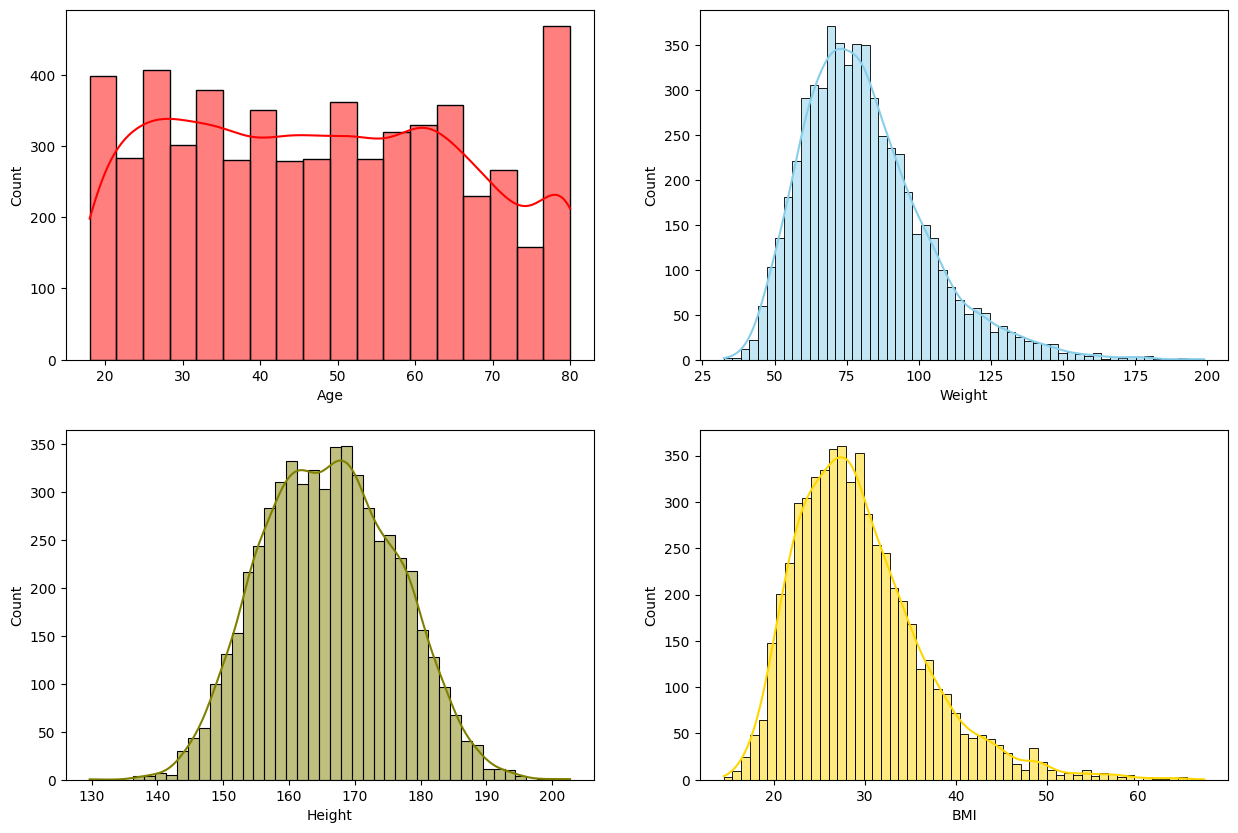

In [ ]:
# creating histogram for quantitative variables
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= da, x="Age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= da, x="Weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= da, x="Height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= da, x="BMI", kde=True, color="gold", ax=axs[1,1])

plt.show()

For the Age histogram it's a uniform shaped with range about 60 and a mean at 48

For Weight histogram it's evidently unimodel right-skewed histogram with range 170 and a mean at 81 with most weights between 60 and 90 kilogrames.

For Height histogram it's a bell_shaped with range 70 and mean at 166

For BMI histogram it's a right skewed with range 50 and mean at 29 and most values between 23 and 35 

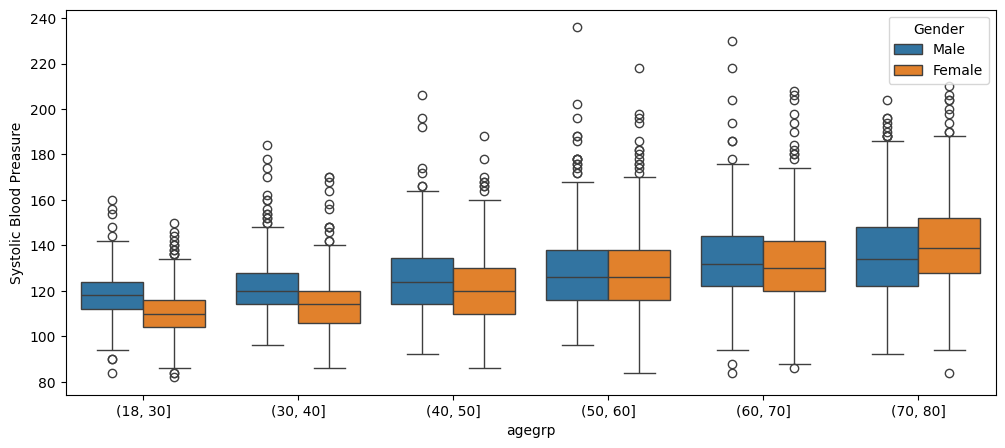

In [38]:
# A side by side boxplots showing the systolic blood preasure for men and women in diffrent ages
da["agegrp"] = pd.cut(da.Age, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y='Systolic Blood Preasure', hue="Gender", data=da);

We see from the figure above that within each gender, older people tend to have higher blood pressure than younger people. However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

average height of men 173.13204987165383 , while for women 159.6731839782756


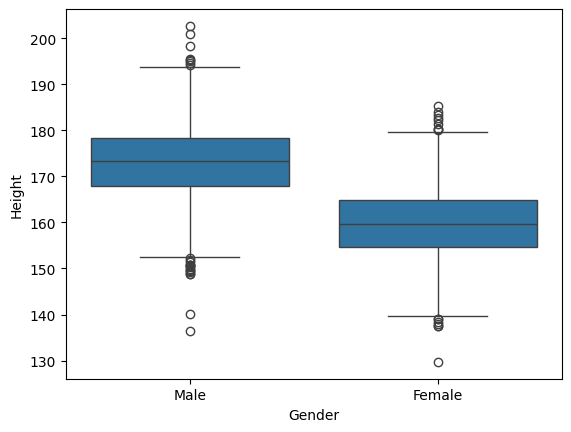

In [39]:
#a side-by-side boxplot showing the heights of women and men.
sns.boxplot(x = da.Gender , y = da.Height);
print(f"average height of men {da[da.Gender =='Male'].Height.mean()} , while for women {da[da.Gender =='Female'].Height.mean()}")

We can see men tend to have higher height than women

In [40]:
db = da.loc[(da['Education Level'] != "Don't know") & (da["Martial Statues"] != "Refused"), :]

In [41]:
# creating a normalized contingency table, counting the number of people in each cell
# defined by a combination of education and marital status.
ct = pd.crosstab(db['Education Level'], da["Martial Statues"] ).apply(lambda x:x / x.sum(), axis = 1)
ct

Martial Statues,Divorced,Living w/partner,Married,Missing,Never married,Separated,Widowed
Education Level,,,,,,,
9-11,0.096423,0.124417,0.474339,0.0,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.0,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.0,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.0,0.199831,0.033727,0.083474
Missing,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
Some college/AA,0.134033,0.100679,0.467573,0.0,0.205065,0.025942,0.066708


We see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates.

marital status is associated with many factors, including gender and eduational status, but also varies strongly by age and birth cohort. For example, it is unlikely for young people to be widowed, and it is less likely for older people to be "never married", since a person can transition from "never married" into one of the other categories, but can never move back.

In [42]:
db.groupby(["Gender", "Education Level", "Martial Statues"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

Martial Statues         Divorced  Living w/partner   Married  Missing  \
Gender Education Level                                                  
Female 9-11             0.113402          0.123711  0.412371      0.0   
       <9               0.091691          0.091691  0.424069      0.0   
       College          0.110181          0.055788  0.577406      0.0   
       HS/GED           0.121784          0.109777  0.413379      0.0   
       Missing          0.000000          0.000000  0.000000      1.0   
       Some college/AA  0.148678          0.099119  0.418502      0.0   
Male   9-11             0.082386          0.125000  0.525568      0.0   
       <9               0.065359          0.111111  0.630719      0.0   
       College          0.063174          0.069337  0.636364      0.0   
       HS/GED           0.092869          0.114428  0.512438      0.0   
       Missing          0.000000          0.000000  0.000000      1.0   
       Some college/AA  0.115331          0.102672  0.530239      0.0   

Martial Statues         Never married  Separated   Widowed  
Gender Education Level                                      
Female 9-11                  0.171821   0.075601  0.103093  
       <9                    0.108883   0.088825  0.194842  
       College               0.182706   0.016736  0.057183  
       HS/GED                0.188679   0.041166  0.125214  
       Missing               0.000000   0.000000  0.000000  
       Some college/AA       0.210352   0.031938  0.091410  
Male   9-11                  0.190341   0.048295  0.028409  
       <9                    0.088235   0.039216  0.065359  
       College               0.187982   0.015408  0.027735  
       HS/GED                0.210614   0.026534  0.043118  
       Missing               0.000000   0.000000  0.000000  
       Some college/AA       0.198312   0.018284  0.035162

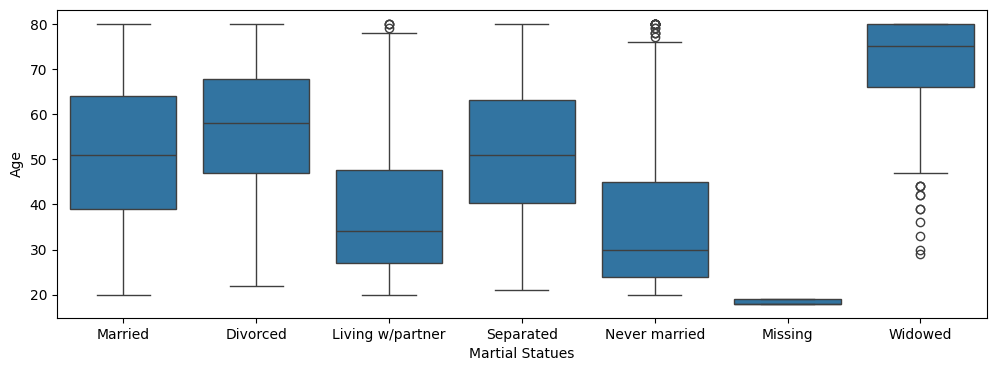

In [43]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(x = db['Martial Statues'], y =db.Age)

# Confidence Intervlas

#### For our population proportions, we will analyze the difference of proportion between female and male smokers.

In [44]:
dz = da.groupby("Gender").Smoking.agg([lambda z : np.mean(z== 'Yes') , 'size'])
dz.columns = ["Proportion", "Size"]
dz

,Proportion,Size
Gender,,
Female,0.304435,2976
Male,0.512142,2759


Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals with level of signficance = 0.05 

In [45]:
#Getting the proprtion and the size men who smoke
pm = dz.Proportion.Male
nm = dz.Size.Male
se_m = np.sqrt(pm * (1 - pm)/ nm) #Calculating standard error
se_m

0.009516254762527675

In [46]:
#Getting the proprtion and the size women who smoke
pf = dz.Proportion.Female
nf = dz.Size.Female
se_f = np.sqrt(pf * (1 - pf) / nf) ##Calculating standard error
se_f

0.008435287344906213

In [48]:
#Calculating standard error difference
se_diff = np.sqrt(se_f**2 + se_m**2)
se_diff

0.012716649609722899

In [49]:
#calculating the differnce of population and the lower & the upper bounds of the confidence intervals
diff_pop = pm - pf
lcb = diff_pop - 1.96 * se_diff
ucb = diff_pop + 1.96 * se_diff
(lcb, ucb)

(0.18278196335791153, 0.2326312298280253)

Based on the results, with 95% of confidence the population proportion of males wo smoke is 18% to 23% higher than 
the population proportion of women who smoke

#### Difference of the Two Population Means of body mass index of men vs women

In [50]:
dz2 = da.groupby("Gender").agg({"BMI": [np.mean, np.std, np.size]})
dz2.columns = ["Mean", 'Std', "Size"]
dz2

,Mean,Std,Size
Gender,,,
Female,29.939946,7.753319,2976
Male,28.778072,6.252568,2759


In [51]:
m_mean , m_std , m_size = dz2.Mean.Male , dz2.Std.Male , dz2.Size.Male
f_mean , f_std , f_size = dz2.Mean.Female , dz2.Std.Female , dz2.Size.Female

sem_male = m_std / np.sqrt(m_size)
sem_female = f_std / np.sqrt(f_size)
(sem_female, sem_male)

(0.14212522940758335, 0.11903715722332031)

In [52]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538992862064452

In [53]:
diff_mean = f_mean - m_mean
lcb = diff_mean - 1.96 * sem_diff
ucb = diff_mean + 1.96 * sem_diff
(lcb, ucb)

(0.798509280230502, 1.5252378004234286)

Based on the results, with 95% of confidence the population mean of BMI of females is 80% to 150% higher than 
the population mean of BMI of men 

# Hypothsis testing

In [54]:
#the skewnnes of each column in the data
da[quantatives.columns].skew()

Weight                     1.014183
BMI                        1.109395
Height                     0.082297
Systolic Blood Preasure    1.040250
dtype: float64

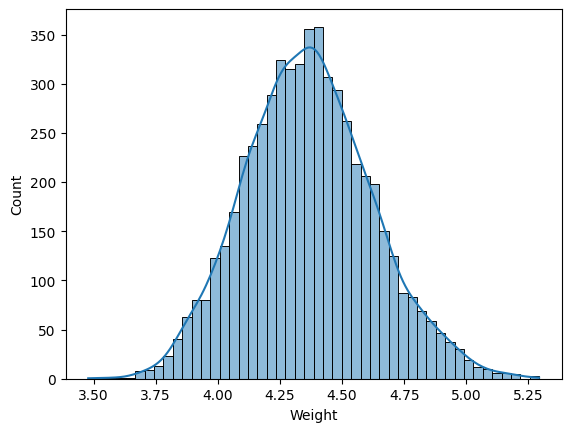

In [55]:
# reduces skewnnes
wt_transformed = np.log(da['Weight'])
sns.histplot(data=da , x = wt_transformed , kde = True);

In [56]:
wt_transformed.skew()

0.1995463386390263

skewennes:  0.3533731786934371


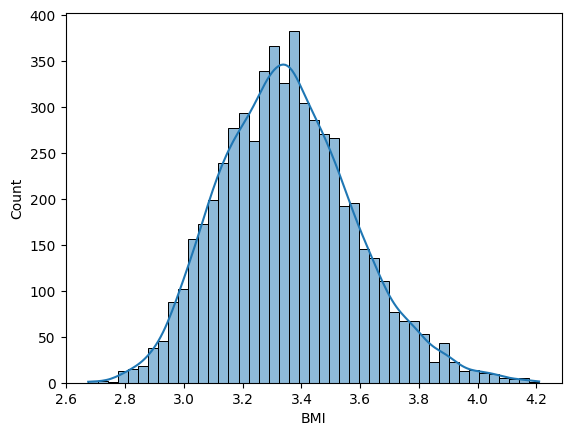

In [57]:
bmi_transformed = np.log(da.BMI)
print('skewennes: ' ,bmi_transformed.skew())
sns.histplot(data=da , x = bmi_transformed , kde = True);

skewnness = 0.5237970506225819


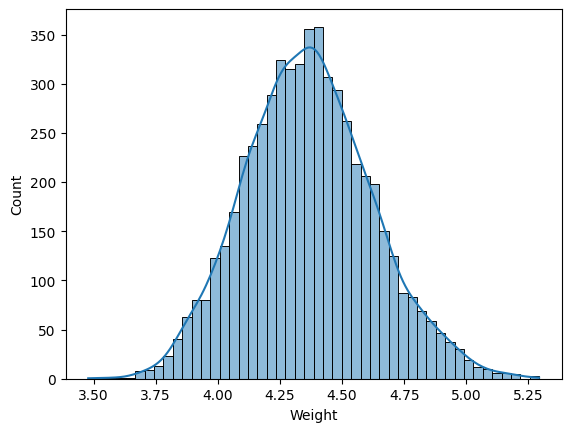

In [58]:
syb_transformed = np.log(da['Systolic Blood Preasure'])
sns.histplot(data=da , x = wt_transformed , kde = True);
print('skewnness =', syb_transformed.skew())

#### It is important to note that the NHANES data are a "complex survey". The data are not an independent and representative sample from the target population. i will ignore this aspect of the data here, and analyze the NHANES data as if it were an independent and identically distributed sample from a population.

We find that the smoking rate for men is around 10 percentage points greater than the smoking rate for females, and this difference is statistically significant (the p-value is around 0.01).

Result : t_value = 0.82, p_value = 0.41

Conclusion The p_value is 0.45 which is bigger then significance value of 0.05 so I can not reject the null hypothesis. In other words, the female age 40-50 are not significantly obese and still considered as overweight.

# 7.Summary
In summary, the dataset I use here relatively friendly and did not need too much intervention for data cleaning because it has no duplicated data and small number of missing values. Besides, the data are also large enough to analyse for various purpose. The distribution of data I used for BMI analysis are also mostly normally distributed or slightly-skewed which make it suitable for modelling.

For further analysis and more accurate modelling, I would encourage to use more variables in the dataset to find more variables which are probably correlated with BMI. There are also some potential that these variables I did not use here were probably skewed and needed more feature engineering process
